# TP 2
# create_gauss_filter
Implementar la función `create_gauss_filter (h, w, k_size, sigma)` para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.
2. Comparar el resultado de hacer un filtrado por convolución con el mismo kernel.

### Implementacion de la funcion create_gauss_filter

In [1]:
import numpy as np
import cv2 as cv
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

In [2]:
def create_gauss_filter(h, w, k_size=15, sigma=3):
    gauss_kernel = cv.getGaussianKernel(k_size, sigma)
    gauss_kernel = np.outer(gauss_kernel, gauss_kernel)
    gauss_kernel = gauss_kernel / np.sum(gauss_kernel)

    filter_ = np.zeros((h, w))
    row = int(w/2) - int(k_size/2)
    col = int(h/2) - int(k_size/2)
    for i in range(0, k_size):
        for j in range(0, k_size):
            filter_[col + i, row + j] = gauss_kernel[i,j]

    # Transformada de Fourier
    ft = np.fft.fft2(filter_)
    ft = np.fft.fftshift(ft)

    return filter_, ft

### representaciones para diferentes tamaños de kernel y sigma

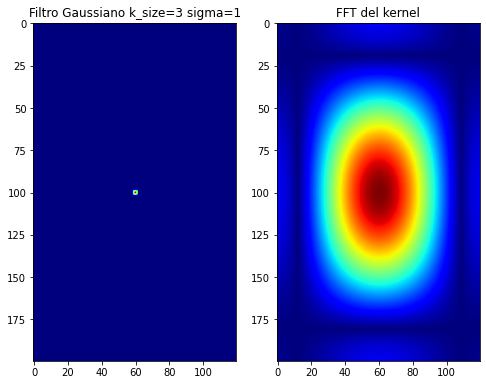

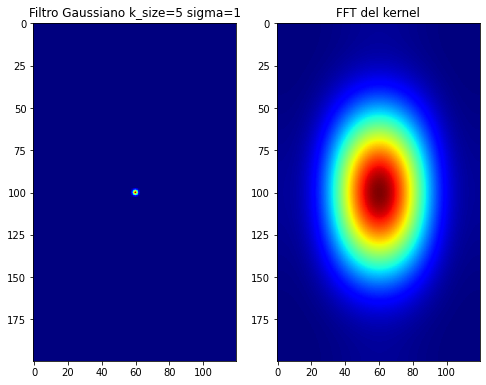

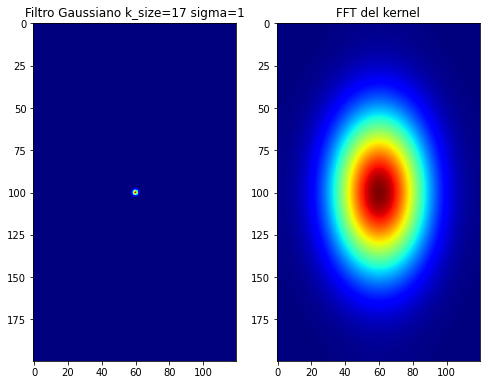

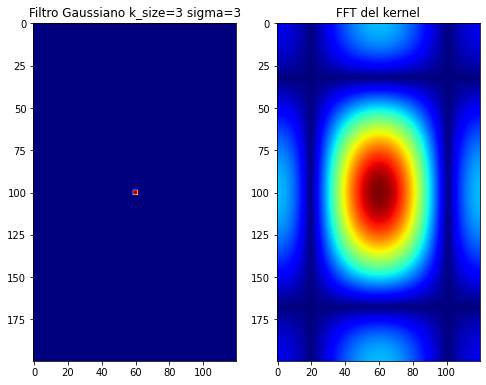

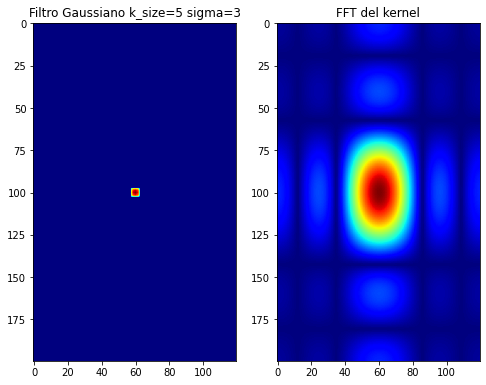

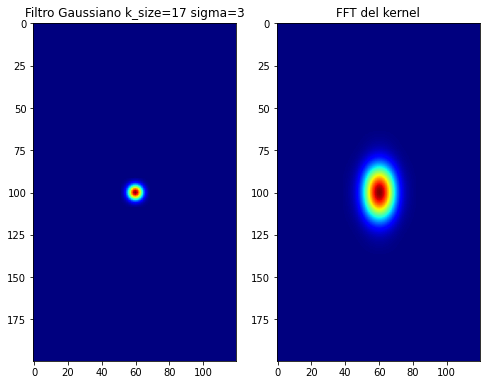

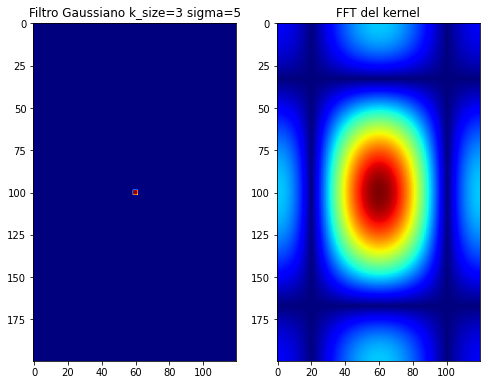

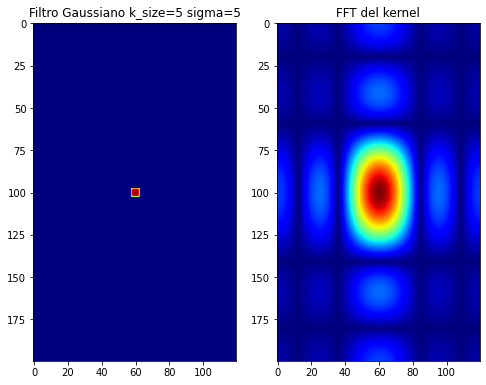

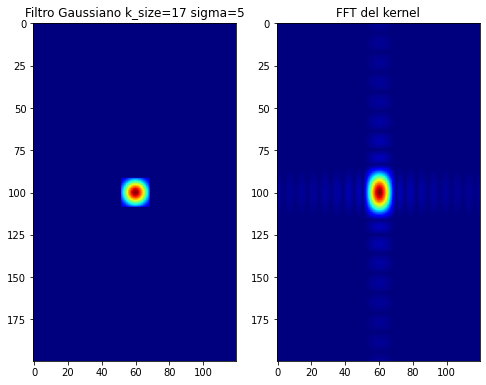

In [3]:
for sigma in [1,3,5]:
    for k_size in [3,5,17]:
        f, ft = create_gauss_filter(200, 120, k_size, sigma)
        magnitude_spectrum = 20*np.log(np.abs(ft)) 
        
        plt.subplot(121)
        plt.imshow(f, cmap="jet")
        plt.title(f"Filtro Gaussiano k_size={k_size} sigma={sigma}")
        
        plt.subplot(122)
        plt.imshow(np.abs(ft), cmap="jet")
        plt.title("FFT del kernel")
        
        plt.show()

### Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.

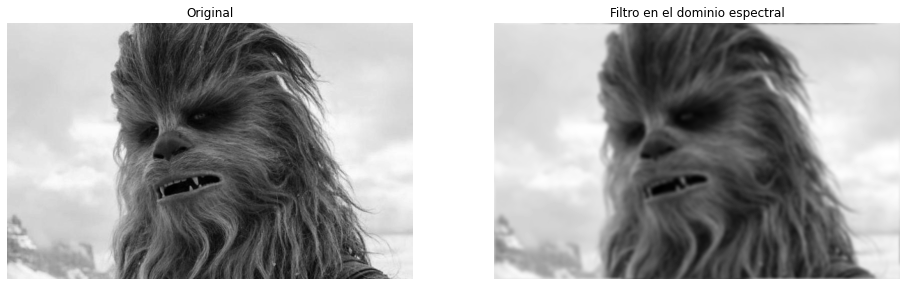

In [4]:
img = cv.imread('img/chewbacca.jpg', cv.IMREAD_GRAYSCALE)

# params #################
k_size = 17
sigma = 5
height, width = img.shape

g_filter, g_filter_ft = create_gauss_filter(height, width, k_size, sigma)

# vuelvo a calcular la FFT. Para aplicar el filtro 
# necesito la transformada en modulo y fase en el dominio
# de los numeros complejos
shifted_fft = np.fft.fftshift(np.fft.fft2(img))   
filtered = shifted_fft * g_filter_ft        

# Aplicamos la antitransformada y obtenemos las imagenes filtradas
f_ishift = np.fft.ifftshift(filtered) # inversa
img_filtered = np.real(np.fft.ifft2(f_ishift)) # parte real
img_filtered = np.fft.ifftshift(img_filtered)

# Graficamos los resultados #################
fig, ax = plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_filtered, cmap='gray')
plt.title("Filtro en el dominio espectral")
plt.axis('off')
plt.show()      

### Comparar el resultado de hacer un filtrado por convolución con el mismo kernel.

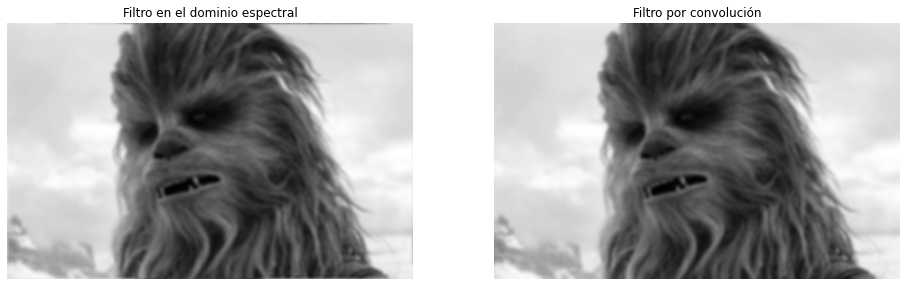

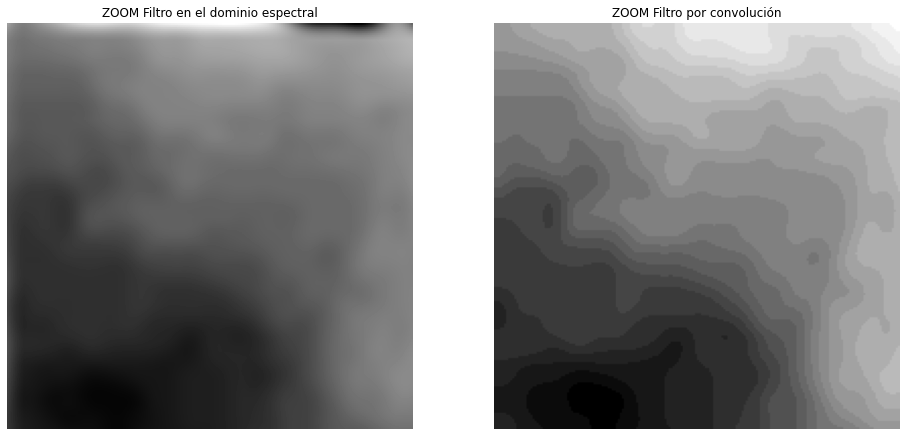

In [5]:
img_filtered_conv = cv.GaussianBlur(img, ksize=(k_size, k_size),sigmaX=sigma, sigmaY=sigma)

# Graficamos los resultados #################
fig, ax = plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(img_filtered, cmap='gray')
plt.title("Filtro en el dominio espectral"); plt.axis('off')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_filtered_conv, cmap='gray')
plt.title("Filtro por convolución")
plt.axis('off')
plt.show()
fig, ax = plt.subplots(1,2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(img_filtered[0:200, 0:200], cmap='gray')
plt.title("ZOOM Filtro en el dominio espectral"); plt.axis('off')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_filtered_conv[0:200, 0:200], cmap='gray')
plt.title("ZOOM Filtro por convolución")
plt.axis('off')
plt.show()

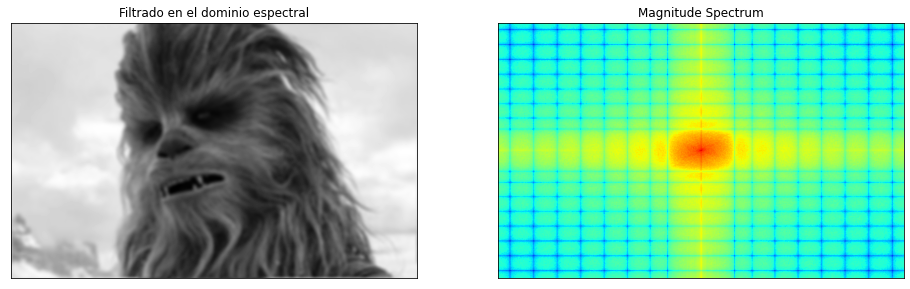

In [13]:
fig, ax = plt.subplots(1,2,figsize=(16,16))
f = np.fft.fft2(img_filtered)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img_filtered, cmap = 'gray')
plt.title('Filtrado en el dominio espectral'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'jet')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

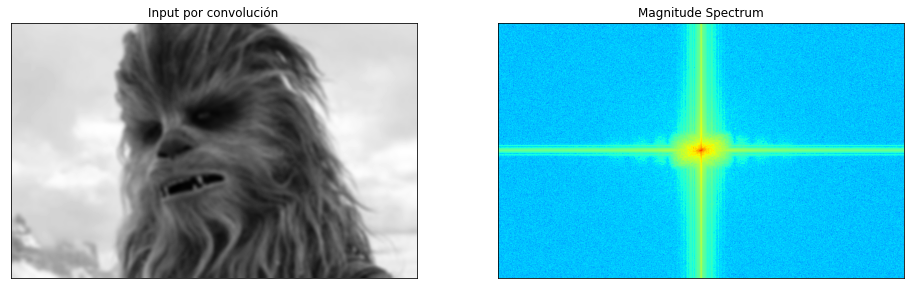

In [12]:
fig, ax = plt.subplots(1,2,figsize=(16,16))
f = np.fft.fft2(img_filtered_conv)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img_filtered_conv, cmap = 'gray')
plt.title('Input por convolución'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'jet')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Conclusiones
A simple vista, la diferencia entre las imágenes no es muy notoria.

Al hacer zoom, podemos notar que en el dominio espectral el degradé es mas suave, con más valores intermedios.

Cuando analizamos el espectro de magnitud de las imagenes, podemos ver que por convolución tenemos un mejor blurreado, ya que tiene menos componentes de alta frecuencia que el filtrado espectral.

# Gradientes
Para la imagen suministrada “metal grid”. Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con colores las direcciones de gradientes más representativos.

In [10]:
img = cv.imread('img/metalgrid.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


colors = {
    1: [255,0,0],
    2: [0,255,0],
    3: [0,0,255],
    4: [255,255,0],
    5: [0,255,255],
    6: [255,0,255],
    0: [0,0,0]
}

# Suavizado Gaussiano
#====================
start = time.time()

blur = cv.GaussianBlur(gray,(5,5),0)

elapsed = time.time()-start
print('Blur {} segundos'.format(elapsed))

# Gradientes
#===========
start = time.time()

# Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

# De igual modo para Sobely
sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

elapsed = time.time()-start
print('Gradientes {} segundos'.format(elapsed))

# Supresión de no-máximos
#========================
start = time.time()

# Encontramos los píxels vecinos (b,c) en la dirección (redondeadea) del gradiente y aplicamos la supresión de no-máximos
M, N = mag.shape
Non_max = np.zeros((M,N), dtype= np.uint8)
grad_colors = np.zeros((M,N,3), dtype= np.uint8)

for i in range(1,M-1):
    for j in range(1,N-1):
       # Horizontal 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180) or (-22.5 <= angle[i,j] < 0) or (-180 <= angle[i,j] < -157.5):
            b = mag[i, j+1]
            c = mag[i, j-1]
        # Diagonal 45
        elif (22.5 <= angle[i,j] < 67.5) or (-157.5 <= angle[i,j] < -112.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
            if (22.5 <= angle[i,j] < 67.5):
                grad_colors[i,j] = colors[1]
            else:
                grad_colors[i,j] = colors[2]
        # Vertical 90
        elif (67.5 <= angle[i,j] < 112.5) or (-112.5 <= angle[i,j] < -67.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
            if (22.5 <= angle[i,j] < 67.5):
                grad_colors[i,j] = colors[3]
            else:
                grad_colors[i,j] = colors[4]
        # Diagonal 135
        elif (112.5 <= angle[i,j] < 157.5) or (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]
            if (112.5 <= angle[i,j] < 157.5):
                grad_colors[i,j] = colors[5]
            else:
                grad_colors[i,j] = colors[6]
        
            
        # Supresión de no-máximos
        if (mag[i,j] >= b) and (mag[i,j] >= c):
            Non_max[i,j] = mag[i,j]
        else:
            Non_max[i,j] = 0

elapsed = time.time()-start
print('No-máximos {} segundos'.format(elapsed))

# Umbralizado por histéresis
#===========================
start = time.time()

UmbralAlto = 21
UmbralBajo = 15

M, N = Non_max.shape
out = np.zeros((M,N), dtype= np.uint8)

# Si la intensidad de un borde es mayor a 'UmbralAlto' es seguro un umbral, debajo de 'UmbralBajo' seguro no es
strong_i, strong_j = np.where(Non_max >= UmbralAlto)
zeros_i, zeros_j = np.where(Non_max < UmbralBajo)

# Bordes débiles
weak_i, weak_j = np.where((Non_max <= UmbralAlto) & (Non_max >= UmbralBajo))

# Setear el mismo valor a todos los tipos de píxel
grad_colors[zeros_i, zeros_j ] = colors[0]
grad_colors[weak_i, weak_j] = colors[0]

elapsed = time.time()-start
print('Histéresis {} segundos'.format(elapsed))



Blur 0.00042510032653808594 segundos
Gradientes 0.026653289794921875 segundos
No-máximos 6.958755254745483 segundos
Histéresis 0.010350942611694336 segundos


## Muestre imágenes de ángulo y módulo

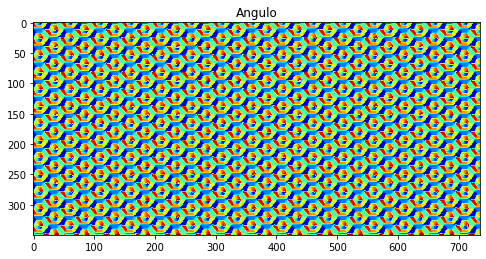

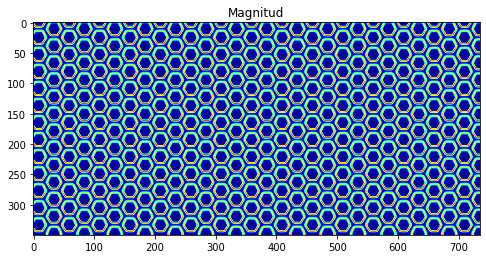

In [11]:
plt.imshow(angle, cmap="jet")
plt.title('Angulo')
plt.show()
plt.imshow(mag, cmap="jet")
plt.title('Magnitud')
plt.show()

## Marque con colores las direcciones de gradientes más representativos

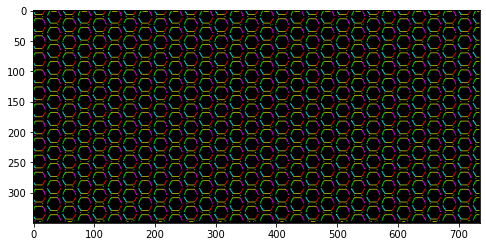

In [12]:
plt.imshow(grad_colors, cmap="jet")
plt.show()